## Árvore de decisão com titanic

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"settebr","key":"71798c39421b8856910ad34ae19ae95f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         46           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        104           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        624           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        124           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1325           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14946           False  
house-pr

In [ ]:
!kaggle competitions list -s titanic

ref                deadline             category            reward  teamCount  userHasEntered  
-----------------  -------------------  ---------------  ---------  ---------  --------------  
spaceship-titanic  2030-01-01 00:00:00  Getting Started  Knowledge       2304           False  
titanic            2030-01-01 00:00:00  Getting Started  Knowledge      14946           False  


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 20.2MB/s]


Exemplo de download em competição que exige check nas regras pelo site do kaggle

In [ ]:
!kaggle competitions download -c spaceship-titanic

  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 89.2MB/s]


Como aceitar?:

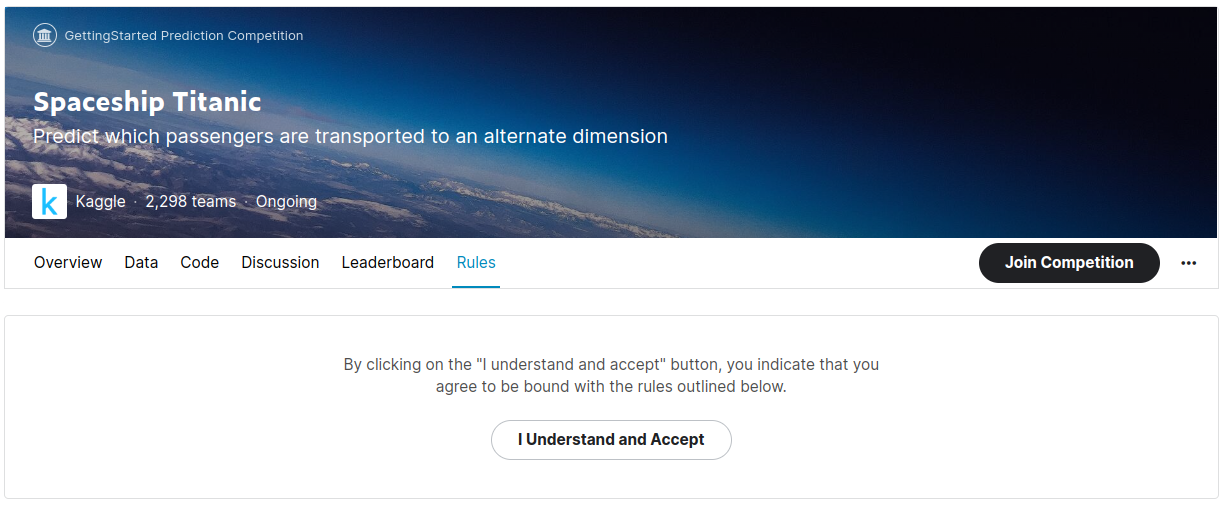

In [ ]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!mkdir -p data/spaceship-titanic.zip
!unzip spaceship-titanic.zip  -d data/spaceship-titanic


Archive:  spaceship-titanic.zip
  inflating: data/spaceship-titanic/sample_submission.csv  
  inflating: data/spaceship-titanic/test.csv  
  inflating: data/spaceship-titanic/train.csv  


In [ ]:
df_train = pd.read_csv("data/titanic/train.csv")

In [ ]:
X = pd.DataFrame(df_train,columns=["Pclass","Sex","Age"])

In [ ]:
y = df_train["Survived"]

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(X["Sex"])

LabelEncoder()

In [ ]:
X["Sex"] = le.transform(X["Sex"])

In [ ]:
X["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
X["Age"].fillna(value = X["Age"].median(),inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y, test_size=0.3,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cls = DecisionTreeClassifier(random_state=1234, criterion='entropy')

cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [ ]:
y_pred = cls.predict(X_test) 

In [ ]:
y_pred.shape

(268,)

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cls.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(cls.score(X_test, y_test)))

Training set score: 0.8892
Test set score: 0.7836
